# Classify With Rules

In [3]:
from context import speechact
import speechact.classifier.algorithmic as algo
import speechact.classifier.base as b
import speechact.evaluation as evaluation
import speechact.corpus as corp
import speechact.annotate as annotate
import speechact.classifier.rulebased as rule

In [4]:
labels = annotate.SpeechActLabels.get_labels()

# Load upsampled data.
corpus = corp.Corpus('../data/annotated data/dev-set-sentiment-upsampled.conllu.bz2')
test_corpus = corp.Corpus('../data/annotated data/dev-set-sentiment-test-upsampled.conllu.bz2')
train_corpus = corp.Corpus('../data/annotated data/dev-set-sentiment-train-upsampled.conllu.bz2')

# Punctuation Classifier

Punctuation classifier results:
Accuracy: 0.5451127819548872
Classification report:
              precision    recall  f1-score   support

   assertion       0.37      0.97      0.53       266
    question       0.95      0.94      0.94       266
   directive       0.00      0.00      0.00       266
  expressive       0.76      0.27      0.40       266
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.55      0.55      0.55      1064
   macro avg       0.30      0.31      0.27      1064
weighted avg       0.52      0.55      0.47      1064

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         257         0          0           9           0        0   
question           16       250          0           0           0        0   
directive         238        14          0          14          

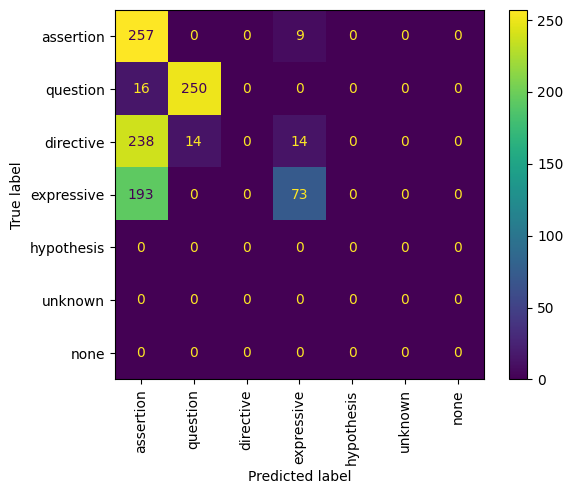

In [13]:
# Evaluate punctuation classifier.
punctuation_classifier = algo.PunctuationClassifier()
print('Punctuation classifier results:')
evaluation.evaluate(test_corpus, punctuation_classifier, labels,
                    draw_conf_matrix=True)

# Algorithmic Classifier

Algorithmic classifier results:
Accuracy: 0.5822878228782288
Classification report:
              precision    recall  f1-score   support

   assertion       0.41      0.83      0.55      1355
    question       0.94      0.95      0.95      1355
   directive       0.57      0.07      0.13      1355
  expressive       0.59      0.48      0.53      1355
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.58      0.58      0.58      5420
   macro avg       0.36      0.33      0.31      5420
weighted avg       0.63      0.58      0.54      5420

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion        1122         9         18         193           0        0   
question           67      1283          0           5           0        0   
directive         964        44        100         247          

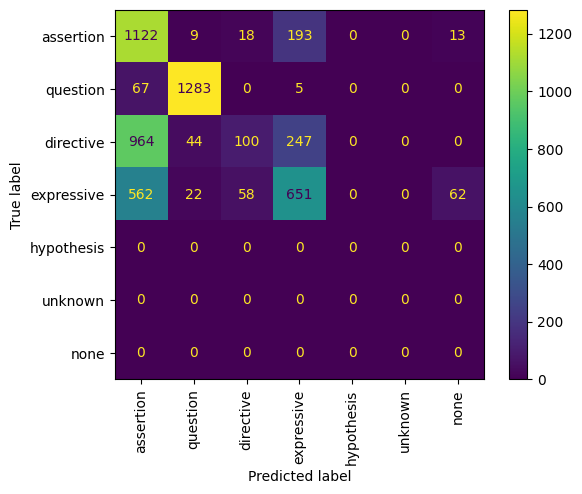

In [7]:
# Evaluate algorithmic classifier.
algo_classifier = algo.RuleBasedClassifier()
print('Algorithmic classifier results:')
evaluation.evaluate(test_corpus, algo_classifier, labels,
                    #print_missclassified=('directive', 'assertion'),
                    draw_conf_matrix=True)

# Preprogrammed Rule-based Classifier

Rule-based classifier results:
Accuracy: 0.4800738007380074
Classification report:
              precision    recall  f1-score   support

   assertion       0.50      0.68      0.58      1355
    question       0.97      0.91      0.94      1355
   directive       0.00      0.00      0.00      1355
  expressive       0.66      0.32      0.43      1355
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.48      0.48      0.48      5420
   macro avg       0.30      0.27      0.28      5420
weighted avg       0.53      0.48      0.49      5420

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         928         6          0         135           0        0   
question           64      1235          0          18           0        0   
directive         449        33          0          77           

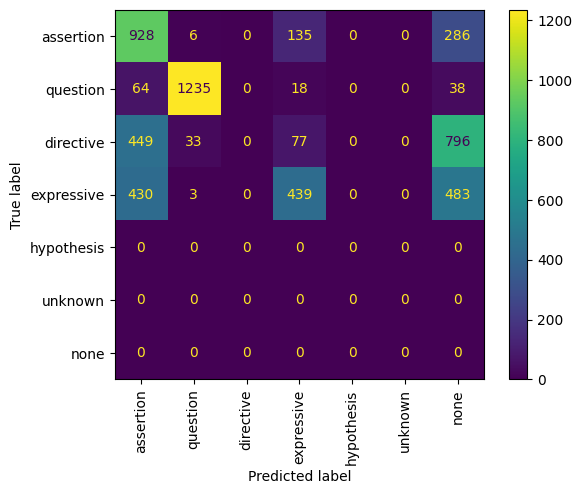

In [12]:
# Evaluate rule based classifier.
rule_classifer = rule.RuleBasedClassifier(ruleset_file='../models/ruleset_1.json')
print('Rule-based classifier results:')
evaluation.evaluate(test_corpus, rule_classifer, labels,
                    draw_conf_matrix=True)

# Trainable Rule-based Classifier (80% training data)

Trainable rule-based classifier results:
Accuracy: 0.6926691729323309
Classification report:
              precision    recall  f1-score   support

   assertion       0.51      0.72      0.60       266
    question       0.95      0.92      0.93       266
   directive       0.79      0.53      0.63       266
  expressive       0.69      0.61      0.64       266
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.69      0.69      0.69      1064
   macro avg       0.42      0.40      0.40      1064
weighted avg       0.73      0.69      0.70      1064

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         192         0         16          56           0        0   
question            6       244         10           3           0        0   
directive          98        14        140          14 

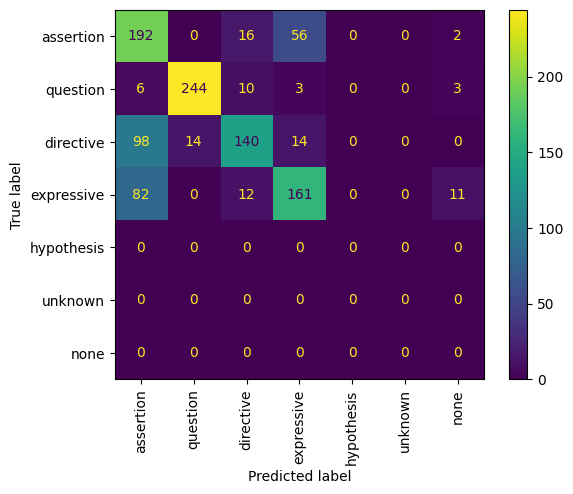

In [9]:
# Evaluate trainable rule based classifier.
trainable_rule_classifier = rule.TrainableClassifier()
trainable_rule_classifier.train(train_corpus)
print('Trainable rule-based classifier results:')
evaluation.evaluate(test_corpus, trainable_rule_classifier, labels,
                    draw_conf_matrix=True)

# Trainable Rule-based Classifier (20% training data)

Trainable rule-based classifier results:
Accuracy: 0.6039944903581267
Classification report:
              precision    recall  f1-score   support

   assertion       0.51      0.54      0.53      1089
    question       0.91      0.90      0.91      1089
   directive       0.47      0.46      0.46      1089
  expressive       0.55      0.52      0.53      1089
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.60      0.60      0.60      4356
   macro avg       0.35      0.35      0.35      4356
weighted avg       0.61      0.60      0.61      4356

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         586         9        284         201           0        0   
question           37       982         33          32           0        0   
directive         269        86        499         224 

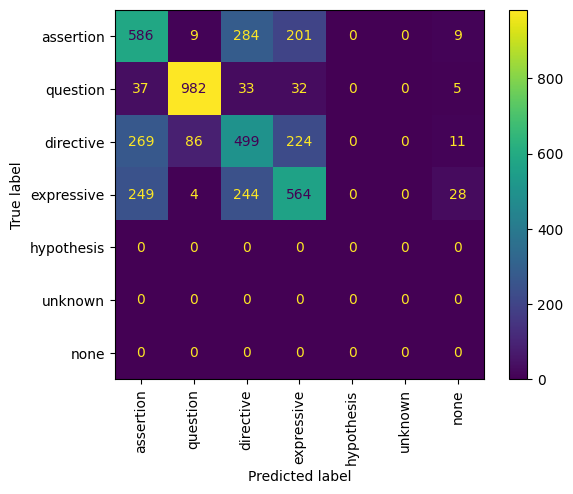

In [10]:
# Evaluate trainable rule based classifier.
trainable_rule_classifier = rule.TrainableClassifier()
trainable_rule_classifier.train(test_corpus)
print('Trainable rule-based classifier results:')
evaluation.evaluate(train_corpus, trainable_rule_classifier, labels,
                    draw_conf_matrix=True)